# Run Predictions

In [51]:
# Standard Imports
import numpy as np

# Importing all relevant packages for modeling in keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

# Import packages for showing the performance metrics
from sklearn.metrics import confusion_matrix

# Impor
import sys
sys.path.append('../src')
import eval_plots

from glob import glob
import cv2
import os
from PIL import Image

import warnings
warnings.filterwarnings(action='ignore')
# Setting the random seed for reproducability
np.random.seed(123)

In [4]:
# obtain paths for all models in models folder
models = glob('/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models/*.h5')

# define list of model names for saving evaluation plots 
model_names = [os.path.basename(path).replace('.h5','') for path in models]

In [6]:
# set up batch generator for validation set define the path to the test set
test_data_path = '../data/split/test'

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
      test_data_path, 
        target_size=(100, 100), 
        batch_size = 32,shuffle=False,class_mode='binary')

# Define list of test labels from test set
y_test = test_generator.labels

Found 16229 images belonging to 2 classes.


In [9]:
# Initialize a dictionary with model names as keys and sub dictionary with probability, predictions
model_eval_dict = {}

# Run predictions with each model
for model_path in models:
    model = load_model(model_path)
    probs = model.predict(test_generator)
    model_eval_dict[os.path.basename(model_path).replace('.h5','')] = probs


In [10]:
for k,v in model_eval_dict.items():
    probs = v
    probs_list = [prob[0] for prob in probs]
    model_eval_dict[k] = probs_list

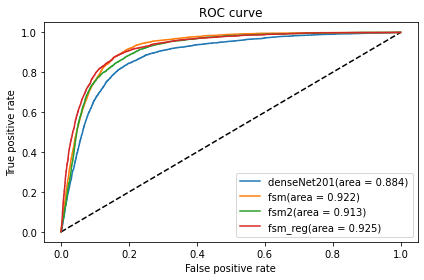

In [15]:
# Plot the ROC-curves for all of the models
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for k,v in model_eval_dict.items():
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, v)

    
    if k == 'fsm':
        auc_keras = auc(1 - fpr_keras, 1 - tpr_keras)
        plt.plot(1 - fpr_keras,1 - tpr_keras, label=k + '(area = {:.3f})'.format(auc_keras))
    else:
        auc_keras = auc(fpr_keras, tpr_keras)
        plt.plot(fpr_keras, tpr_keras, label=k + '(area = {:.3f})'.format(auc_keras))
    # plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
fig.tight_layout()
fig.savefig('denseNet201_ROC.png')
plt.show()
# # Zoom in view of the upper left corner.
# plt.figure(2)
# plt.xlim(0, 0.2)
# plt.ylim(0.8, 1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve (zoomed in at top left)')
# plt.legend(loc='best')
# plt.show()                                            


In [16]:
models

['/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\denseNet201.h5',
 '/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\fsm.h5',
 '/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\fsm2.h5',
 '/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\fsm_reg.h5']

In [24]:
model = load_model('../../models/second_reg.h5')

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
data = glob('./test/13916/**/*.png', recursive=True)

# Separating file name from the path of the file
files = []
for datum in data:
        files.append(os.path.basename(datum))

# removing the .png from the file names and isolating the x, y positions of the images
x = []
y = []
for file in files:
    # isolating the x and y coordinates of the image and converting to int type
    x.append(int(file.split('_')[2].replace('x','')))
    y.append(int(file.split('_')[3].replace('y','')))


# Initialize the full image space
full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')

for datum in data:
    # Isolate the file name
    file = os.path.basename(datum)

    # grab the location of the image from the file
    x = int(file.split('_')[2].replace('x',''))
    y = int(file.split('_')[3].replace('y',''))
    case = file.split('_')[-1].replace('.png','')

    # Load the image in using the cv library
    img = Image.open(datum)

    # paste the image into the image space
    fu    full_slide.resize(())ll_slide.paste(img,(x-51,y-51))

#     # paste the image into the image space
#     if case == 'class0':
#         full_slide.paste(img_neg,(x-51,y-51))
#     else:
#         full_slide.paste(img_pos,(x-51,y-51))


In [149]:
full_slide.save('13916_whole_slide_image.png')

In [156]:
full_slide.save('13916_heat_map.png')

In [8]:
model = load_model(models[-1])

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)        

# Heat Map Evaluation of Best Model Using GradCAM

In [10]:
last_convolutional_layer = 'conv2d_15'

In [20]:
image_path = '../images/test_images/9037_idx5_x1501_y501_class1.png'
target_size=(100,100)

In [21]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


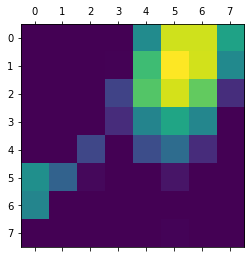

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
array = get_img_array(image_path,target_size)

model = load_model(models[-1])
model.layers[-1].activation = None
preds = model.predict(array)
# print("Predicted",preds.decode_predictions(preds,top=1)[0])

heatmap = make_gradcam_heatmap(array,model,last_conv_layer_name=last_convolutional_layer)

plt.matshow(heatmap)
plt.show()

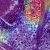

In [48]:
import matplotlib.cm as cm
from IPython.display import Image, display
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    # display(Image(cam_path))
    return superimposed_img

save_and_display_gradcam(image_path, heatmap)

In [39]:
image_heat = load_img('cam.jpg',target_size=(200,200))

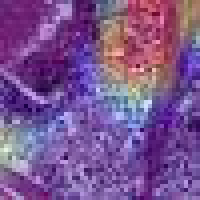

In [40]:
image_heat

In [54]:
# Importing Pillow to handle the concatenation
from PIL import Image, ImageColor

# Importing glob to import the images
from glob import glob

# Importing cv to convert the image paths into images
import cv2

# Importing os to separate and process the image file names
import os

# Standard Imports
import numpy as np

# Importing all relevant packages for modeling in keras
from tensorflow.keras.preprocessing import image

def concat(key_word, slide_number, model):
    # Loading in the images of one scan 8863
    data = glob('../data/IDC_regular_ps50_idx5/'+slide_number+'/**/*.png', recursive=True)

    # If printing the heatmap from GradCAM remove the activation mode on the last layer of the model
    if key_word == 'heat':
        model.layers[-1].activation = None

    # Separating file name from the path of the file
    files = []
    for datum in data:
            files.append(os.path.basename(datum))
    
    # removing the .png from the file names and isolating the x, y positions of the images
    x = []
    y = []
    for file in files:

        # isolating the x and y coordinates of the image and converting to int type
        x.append(int(file.split('_')[2].replace('x','')))
        y.append(int(file.split('_')[3].replace('y','')))
                
    # Initialize the full image space
    full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')
    
    for datum in data:
        # Isolate the file name
        file = os.path.basename(datum)
        
        # grab the location of the image from the file
        x = int(file.split('_')[2].replace('x',''))
        y = int(file.split('_')[3].replace('y',''))
        case = file.split('_')[-1].replace('.png','')
        
        # Load the image in using the cv library
        img = Image.open(datum)
        
        # paste the image into the image space
        full_slide.paste(img,(x-51,y-51))
        
        if key_word == 'class':
            # paste the image into the image space
            if case == 'class0': 
                img_neg = Image.new('RGB',(50,50),color="#77c128")
                full_slide.paste(img_neg,(x-51,y-51))
            
            else:
                img_pos = Image.new('RGB',(50,50),color='#dd5866')
                full_slide.paste(img_pos,(x-51,y-51))
        elif key_word == 'image':
            img = Image.open(datum)
            full_slide.paste(img,(x-51,y-51))

        elif key_word == 'predict':
            # Function loading in an image from the dataset and making a prediction
            def make_prediction(img_path,target_size):
                img = image.load_img(img_path,target_size=target_size)
                img_array = image.img_to_array(img)
                img_batch = np.expand_dims(img_array,axis=0)
                # img_preprocessed = preprocess_input(img_array)
                return float(model.predict(img_batch/255))

            prediction = make_prediction(datum,(100,100))
            img = Image.new('RGB',(50,50),color=(int(255*prediction),int(255*prediction),int(255*prediction)))
            full_slide.paste(img,(x-51,y-51))
        elif key_word == 'heat':
            array = get_img_array(datum,target_size)

            # model = load_model(models[-1])
            # model.layers[-1].activation = None
            preds = model.predict(array)

            heatmap = make_gradcam_heatmap(array,model,last_conv_layer_name=last_convolutional_layer)
            img = save_and_display_gradcam(datum, heatmap)
            full_slide.paste(img,(x-51,y-51))

        else:
            print('not a valid key word')
            break
            
    return full_slide

In [56]:
heat_map = concat('heat','9037',model)

In [57]:
heat_map.save('../images/example_heat_map_gradCAM.png')